# FOURIER ANALYSIS IN ONE DIMENSION

The goal of this notebook is to show some useful math tools to analize random signals via **Fourier Transform**, in one dimension. In order to do that I will reconstruct the path in which a Fourier Transform is built.

In [31]:
%matplotlib notebook
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from matplotlib.widgets import CheckButtons
# HIDE CELLS
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

## Random Wave
In this section I ploted two harmonics waves, using numpy, to add them and produce the composed signal. Futhermore, to make it easier to understand,I've included some sliders and buttom that allow you to change some parameters when it's necessary.

<IPython.core.display.Javascript object>


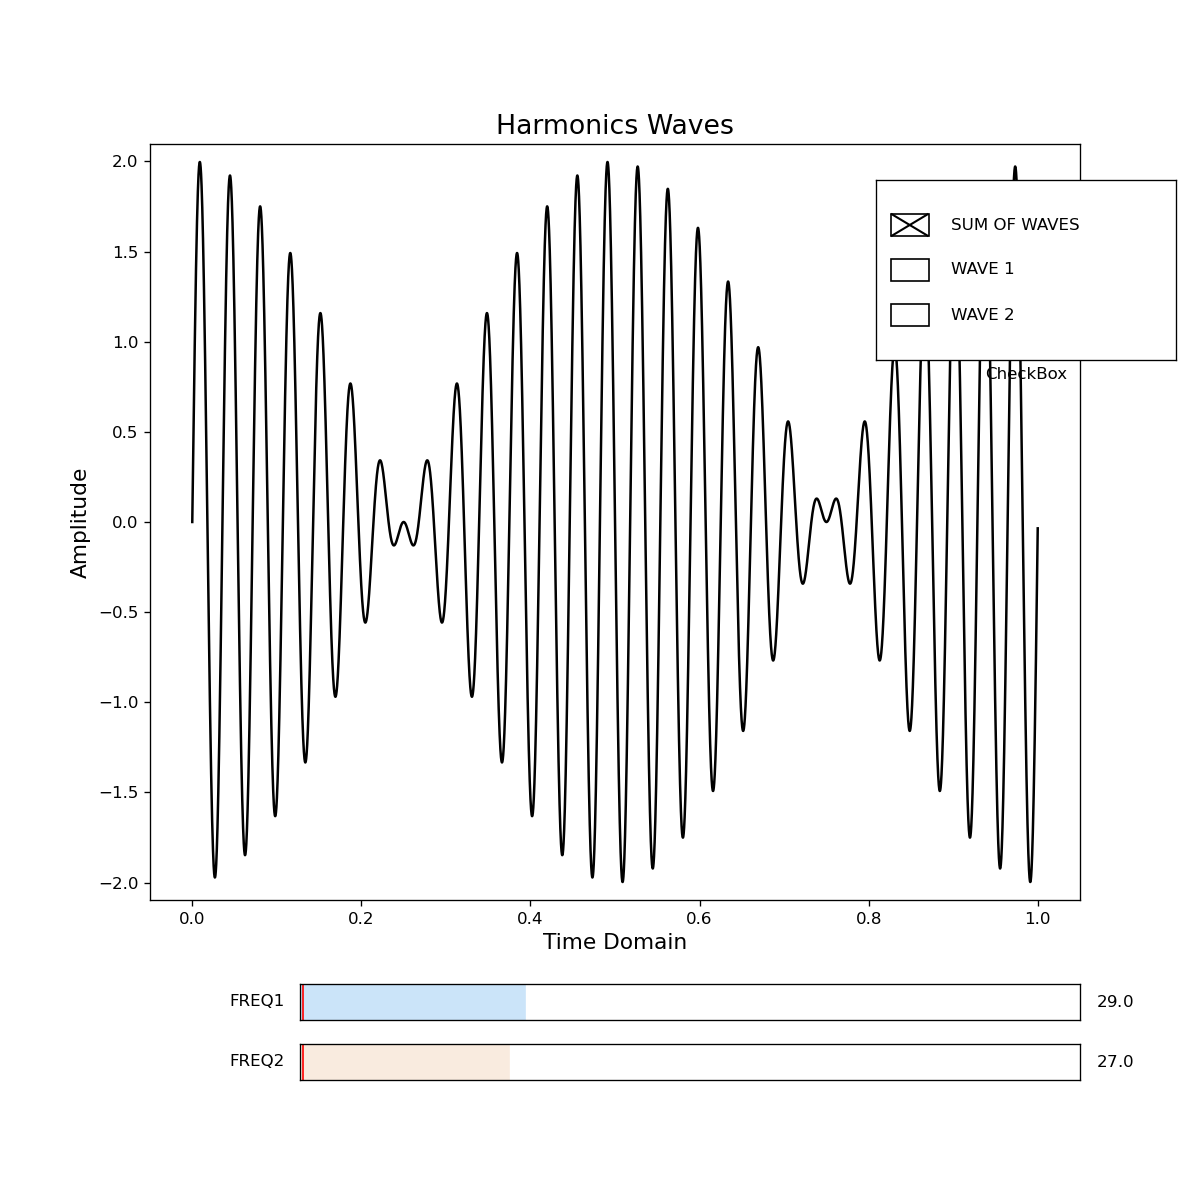

In [32]:
A = 1 # AMPLITUDE
# WAVE 1
# Comma Meaning: https://stackoverflow.com/questions/16037494/x-is-this-trailing-comma-the-comma-operator
# Create and plot sine waves
t = np.arange(0.0, 1.0, 0.0001)
s1 = A * np.sin(2 * np.pi * 3 * t)

# WAVE 2
# Comma Meaning: https://stackoverflow.com/questions/16037494/x-is-this-trailing-comma-the-comma-operator
# Create and plot sine waves
t = np.arange(0.0, 1.0, 0.0001)
s2 = A * np.sin(2 * np.pi * 2 * t)

#CREATE ONE PLOT
fig = plt.figure(figsize = (10,10))
#makes the bottom margin of the whole plot (area containing 3 subplots) 25% of the figure height.
plt.subplots_adjust(bottom=.25)
ax = fig.subplots()
ax.set_title('Harmonics Waves',fontsize = 16)
ax.set_xlabel('Time Domain',fontsize = 13)
ax.set_ylabel('Amplitude',fontsize = 13)

p, = ax.plot(t,s1+s2,color = 'black',label = 'SUM OF WAVES')
p2, = ax.plot(t,s2,color = '#f9ebdf',label='WAVE 2')
p1, = ax.plot(t,s1,color = '#cbe4f9',label='WAVE 1') # COMMA CONNECT WITH SLIDER

#SLIDER
ax_slide1=plt.axes([0.25, 0.15, 0.65, 0.03]) # CREATE THE SLIDER BAR 1
ax_slide2=plt.axes([0.25, 0.1, 0.65, 0.03]) # CREATE THE SLIDER BAR 2
#Slider Movement
freq1_factor=Slider(ax_slide1,"FREQ1",valmin=0.2,valmax=100.0,valinit=.6,valstep=.2,color ='#cbe4f9')
freq2_factor=Slider(ax_slide2,"FREQ2",valmin=0.2,valmax=100.0,valinit=.6,valstep=.2,color = '#f9ebdf')

#BUTTONS
# Make checkbuttons with all plotted lines with correct visibility
lines = [p, p1, p2]
rax = plt.axes([0.73, 0.7, 0.25, 0.15])
labels = [str(line.get_label()) for line in lines]
visibility = [line.get_visible() for line in lines]
check = CheckButtons(rax, labels, visibility)

def func(label):
    index = labels.index(label)
    lines[index].set_visible(not lines[index].get_visible())
    plt.draw()

check.on_clicked(func)

# CONNECT WITH GRAPH
def update(val):
    f1 = freq1_factor.val
    f2 = freq2_factor.val
    p1.set_ydata(A*np.sin(2*np.pi*f1*t))
    p2.set_ydata(A*np.sin(2*np.pi*f2*t))
    p.set_ydata(A*np.sin(2*np.pi*f1*t) + A*np.sin(2*np.pi*f2*t))
    #fig.canvas.draw()
    
freq1_factor.on_changed(update)
freq2_factor.on_changed(update)
plt.xlabel('CheckBox')
plt.show()
display(tag)

# CENTER OF MASS
Now, I took the amplitude of the resulting wave 'f(t)' as function of time to wrap it in a circumference of radius 1. The complex exponential, $e^{i2\pi f t}$ is perfect to face this task, beeing 'f' the frequency of wrapping, not the wave frequency. 

\begin{equation}
F(\nu) = FT[f(t)] = \int_{-\infty}^{\infty} f(x)\cdot e^{-i2 \pi \nu t}dt
\end{equation}

Finally, I've divided by a factor, to control the center of mass position and restrict it to the plot frame.

<IPython.core.display.Javascript object>


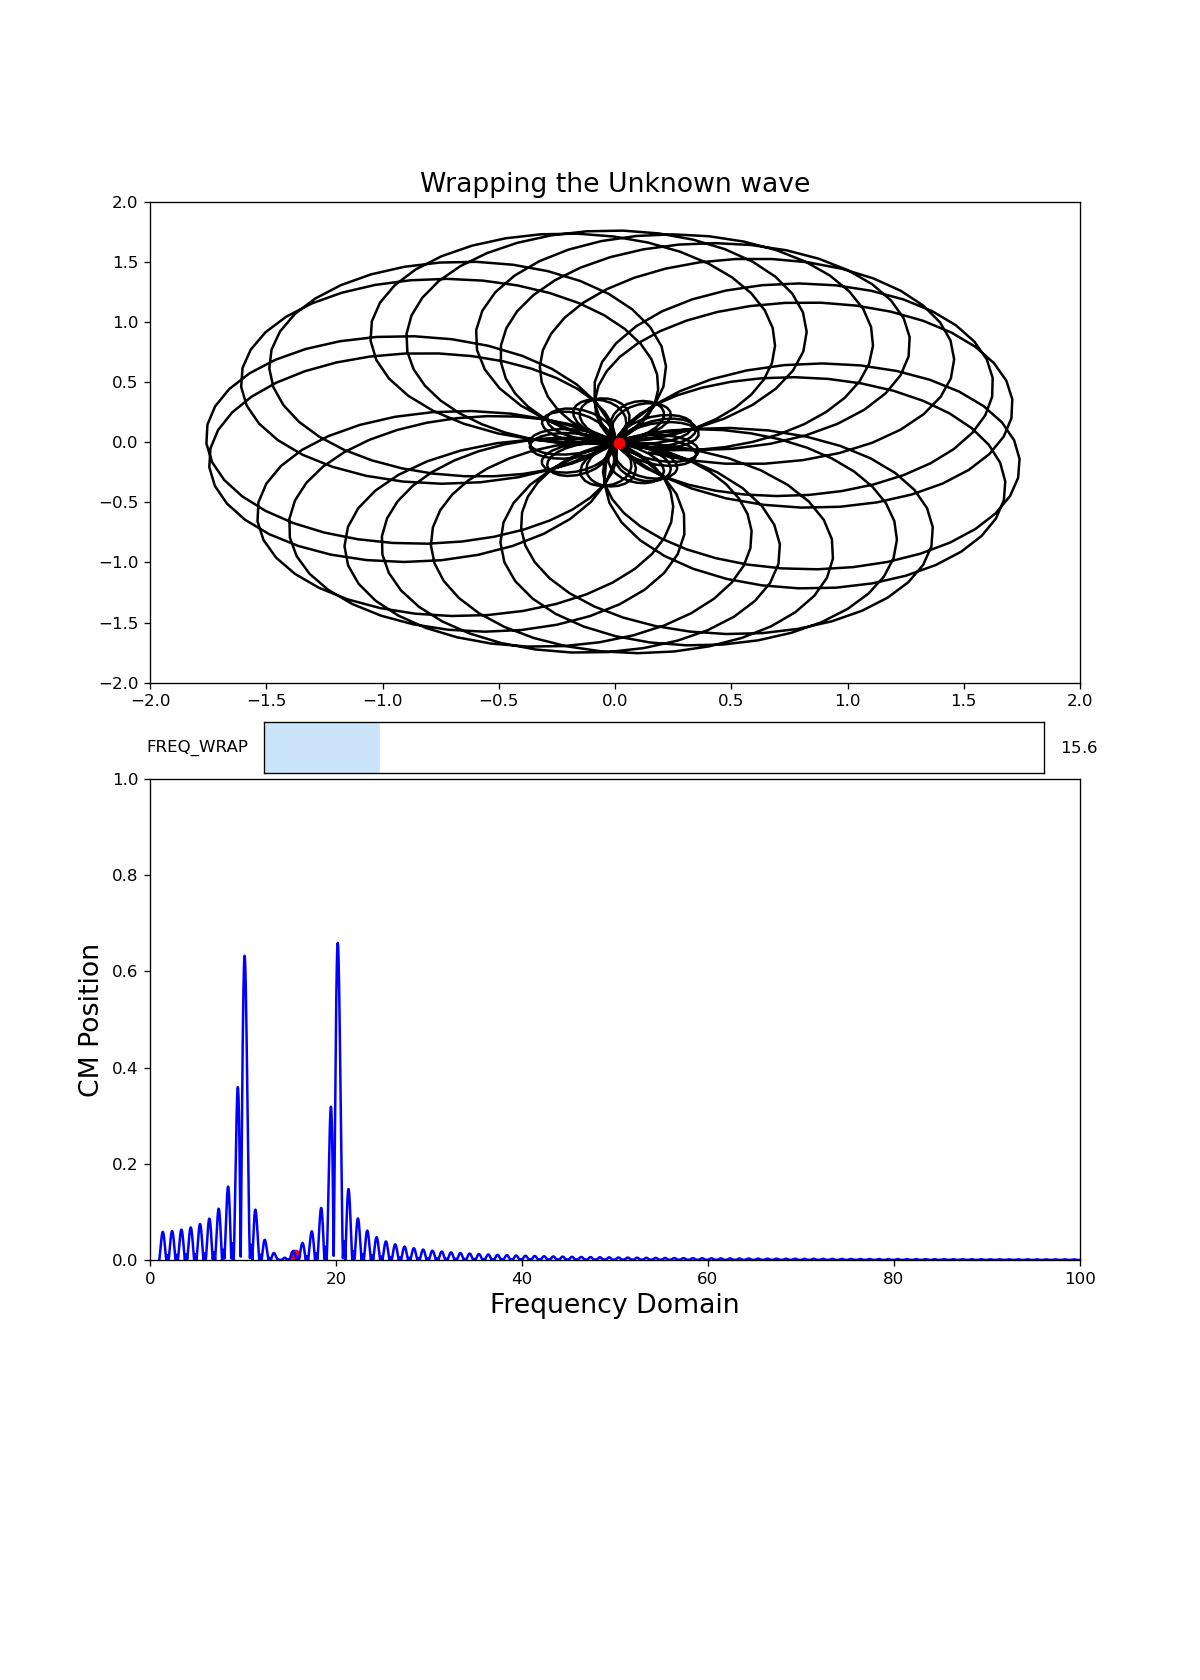

In [30]:
freq_min = 1
freq_max = 100
freq_loop = np.linspace(freq_min,freq_max,5000)
prec = 1/1.1e3

# GIVEN A RANDOM WAVE WHICH IS SUM OF TWO WAVES:
A = 1 # AMPLITUDE
# WAVE 1
# Comma Meaning: https://stackoverflow.com/questions/16037494/x-is-this-trailing-comma-the-comma-operator
# Create and plot sine waves
t = np.arange(0.0, 1.0, prec)
s1 = A * np.sin(2 * np.pi * 20 * t)

# WAVE 2
# Comma Meaning: https://stackoverflow.com/questions/16037494/x-is-this-trailing-comma-the-comma-operator
# Create and plot sine waves
t = np.arange(0.0, 1.0, prec)
s2 = A * np.sin(2 * np.pi * 10 * t)

# RANDOM WAVE:
s = s1 + s2

#CREATE ONE PLOT
fig = plt.figure(figsize = (10,14))
#makes the bottom margin of the whole plot (area containing 3 subplots) 25% of the figure height.
plt.subplots_adjust(bottom=.25)
ax = fig.subplots(2)
ax[0].set_title('Wrapping the Unknown wave',fontsize = 16)

ax[1].set_title('Fourier Transform',fontsize = 16)
ax[1].set_xlabel('Frequency Domain',fontsize = 16)
ax[1].set_ylabel('CM Position',fontsize = 16)

# WRAPPING:
freq_wrap = 3
wrap = s*np.exp(2j*np.pi*t*freq_wrap)

#CENTER OF MASS
factor = 1/prec # To restrict the area of the center of mass inside the plot range
ms_sum = np.sum(wrap)/factor
ms_abs = np.abs(ms_sum)
ms_x = []
ms_y = []
#line plot of center mass
for freq_wrap in freq_loop:
    arg = s*np.exp(-2j*np.pi*t*freq_wrap)
    ms_x.append(freq_wrap)
    ms_y.append(np.abs(np.sum(arg.real)/factor+np.sum(arg.imag)/factor))

################################################
w, = ax[0].plot(wrap.real,wrap.imag,color = 'black')
ms, = ax[0].plot(ms_sum.real,ms_sum.imag,'ro')
FT, = ax[1].plot(ms_sum.real,ms_sum.imag,'ro')
msxy = ax[1].plot(ms_x,ms_y,'blue')
ax[0].set_xlim(-2,2)
ax[0].set_ylim(-2,2)

ax[1].set_xlim(0,100)
ax[1].set_ylim(0,1)


#SLIDER
ax_slide_wrap=plt.axes([0.22, 0.54, 0.65, 0.03]) # CREATE THE SLIDER BAR 1


#Slider Movement
wrap_factor=Slider(ax_slide_wrap,"FREQ_WRAP",valmin=freq_min,valmax=freq_max,valinit=.6,valstep=.2,color ='#cbe4f9')

# CONNECT WITH GRAPH
def update(val):
    freq_wrap = wrap_factor.val
    arg = s*np.exp(-2j*np.pi*t*freq_wrap)
    w.set_xdata(arg.real)
    w.set_ydata(arg.imag)
    ms.set_xdata(np.sum(arg.real)/factor)
    ms.set_ydata(np.sum(arg.imag)/factor)
    FT.set_xdata(freq_wrap)
    FT.set_ydata(np.abs(np.sum(arg.real)/factor+np.sum(arg.imag)/factor))
    #fig.canvas.draw()
    
wrap_factor.on_changed(update)

plt.show()
display(tag)

## Reading a random signal

Now I read an unknown signal to apply the previous model determining his fundamental frequencies.

length = 15.27873015873016s


<IPython.core.display.Javascript object>


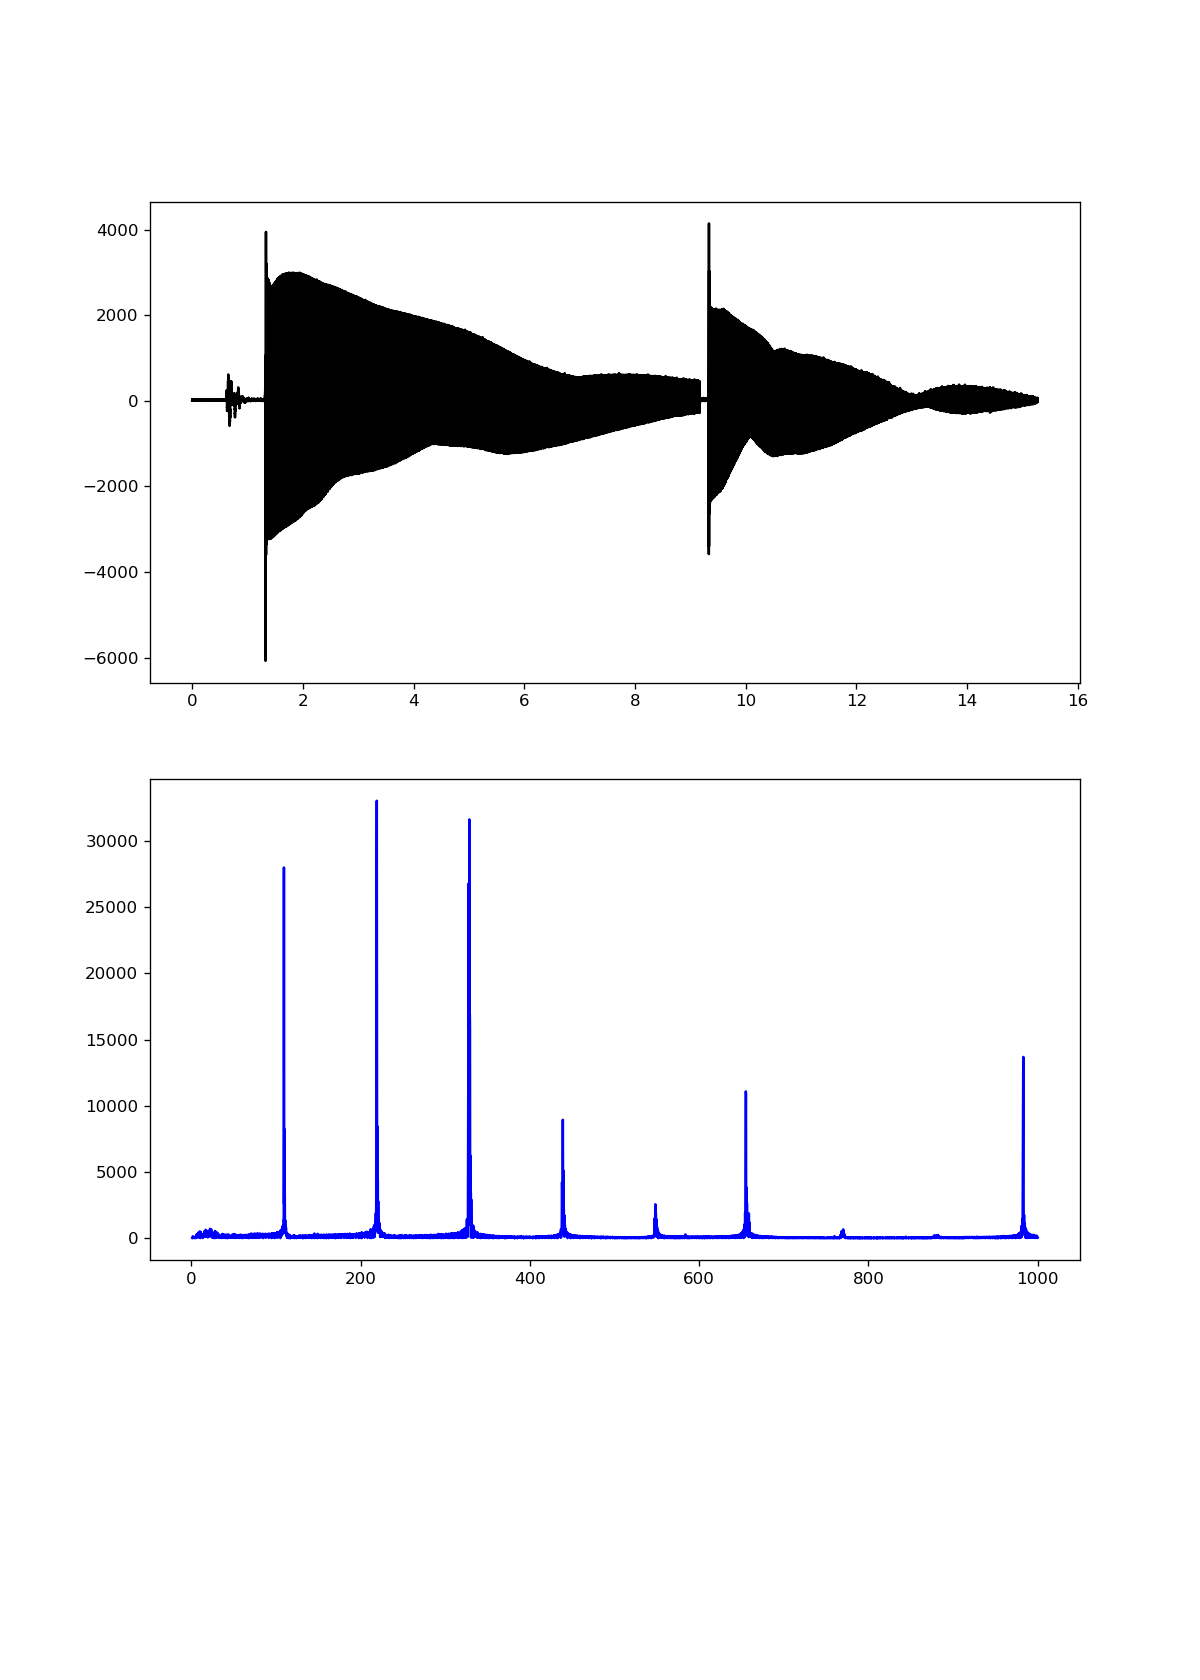

In [4]:
freq_min = 1
freq_max = 1000
freq_loop = np.linspace(freq_min,freq_max,5000)
#scipy.io.wavfile.read(somefile) returns a tuple of two items: 
#the first is the sampling rate in samples per second, the second is a numpy array 
#with all the data read from the file:

#IMPORT WAV FILE
from scipy.io import wavfile
samplerate, data = wavfile.read('/home/sergio/PYTHON_PROGRAMS/OPTICA_3/GUITARSOUND.wav')

length = data.shape[0] / samplerate
print(f"length = {length}s")

#PLOT THE FUNCTION 
t = np.linspace(0., length, data.shape[0])

#CREATE ONE PLOT
fig = plt.figure(figsize = (10,14))
#makes the bottom margin of the whole plot (area containing 3 subplots) 25% of the figure height.
plt.subplots_adjust(bottom=.25)
ax = fig.subplots(2)
ax_wave = ax[0].plot(t, data,color = 'black')

#FOURIER
factor = 1000 # To restrict the area of the center of mass inside the plot range
ms_x = []
ms_y = []
#line plot of center mass
for freq_wrap in freq_loop:
    arg = data*np.exp(-2j*np.pi*t*freq_wrap)
    ms_x.append(freq_wrap)
    ms_y.append(np.abs(np.sum(arg.real)/factor+np.sum(arg.imag)/factor))

msxy = ax[1].plot(ms_x,ms_y,'blue')

plt.show()